In [1]:
from filter_forecast.particle_filter.transition import GaussianNoiseModel
from filter_forecast.particle_filter.log_pf import ModelParameters

params = ModelParameters()
model = GaussianNoiseModel(params)

In [2]:
import jax.numpy as jnp

days = 150
initial_state = jnp.array([9995, 5, 0, 0, 0])
states = jnp.zeros((days, 5))
states = states.at[0].set(initial_state)

curr_state = initial_state
for t in range(1, days):
    curr_state += model.det_component(curr_state, t=0, beta=0.2)
    states = states.at[t].set(curr_state)

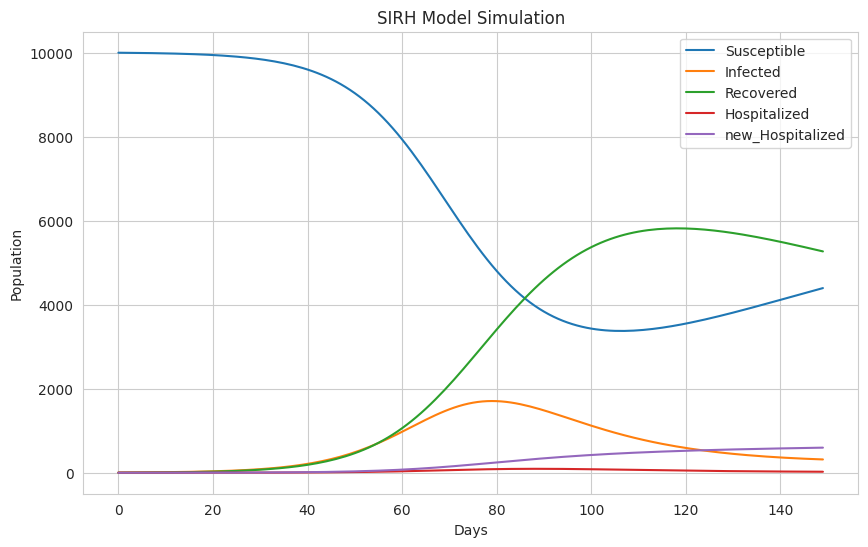

In [3]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(states[:, 0], label="Susceptible")
plt.plot(states[:, 1], label="Infected")
plt.plot(states[:, 2], label="Recovered")
plt.plot(states[:, 3], label="Hospitalized")
plt.plot(states[:, 4], label="new_Hospitalized")
plt.xlabel("Days")
plt.ylabel("Population")
plt.title("SIRH Model Simulation")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from filter_forecast.particle_filter.init_settings import InitSettings
from filter_forecast.particle_filter.particle_cloud import ParticleCloud

settings = InitSettings(
    num_particles=500,
    population=10000,
    location_code="04",
    runtime=days,
    prediction_date="2024-07-22",
    beta_prior=(0.1, 0.25),
    seed_size=0.1
)

In [5]:
from filter_forecast.particle_filter.log_pf import run_pf

output = run_pf(settings=settings, observation_data=states[:, 5], runtime=days)

Running Particle Filter: 100%|██████████| 150/150 [05:09<00:00,  2.07s/it]


In [6]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(output)
df.insert(loc=1, column="true_value", value=[0.2 for _ in range(days)], allow_duplicates=True)
df.rename(columns={0: 'pf_avg_beta'}, inplace=True)
list(df.columns)

['pf_avg_beta', 'true_value']

<Axes: >

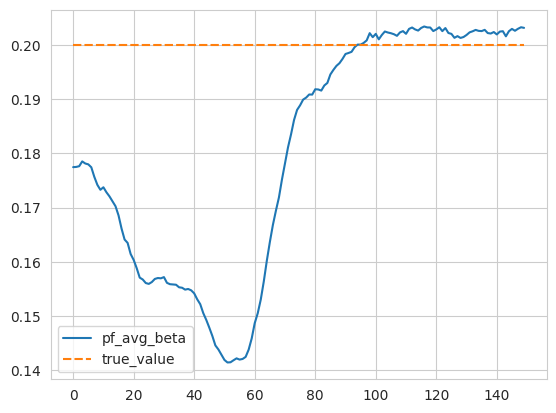

In [7]:
sns.lineplot(data=df)